This notebook contains code for generating explainatory figures relating to performance.

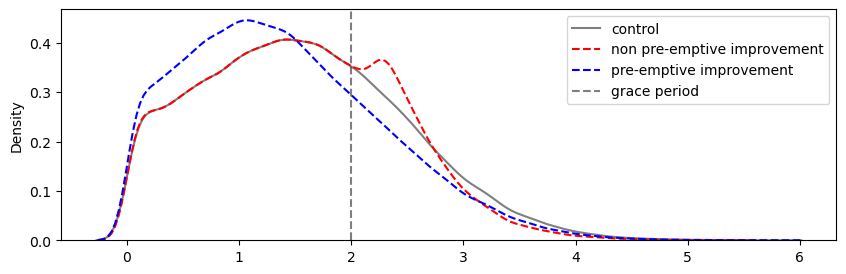

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import icua_analysis as ia
import seaborn as sns

np.random.seed(0)

mu = 2
sigma = 2
N = 100000
GRACE_PERIOD = 2

# Control condition performance distribution (simulated not accurate)
fl = np.random.normal(mu, sigma, size=N)
fl = np.abs(fl + mu/2) / 2
fig = plt.figure(figsize=(10,3))
xlim = (fl.min(), fl.max())

#sns.histplot(fl, bins=50, color="green", stat="density", binrange=xlim, shrink=0.8, linewidth=0)
sns.kdeplot(fl, color="black",  alpha=0.5, label="control")



# Types of effects that might result from guidance


# randomly select some fl > grace period to move leftward (this indicates an improvement in performance)

# An important thing to note is that any FL that was impacted by guidance will not be improved beyond 
# the grace period*. A FL that may have been 5s without guidance might be reduced to say 3s, but not 1s. 
# This is because a given FL will already be >= to the grace period when the participant attends to the failure.
# *Otherwise this would imply a pre-empting of guidance, which could only be learned during guided trials.
# Guidance pre-empting is not impossible, the presense of guidance might alert the participant to an
# issue with their strategy, for example, perhaps they do not pay enough attention to one task but after
# having the agents point this out they may then adapt their strategy to look at this task more often (effectively 
# pre-empting guidance).


# The first effect type: non pre-emptive improvement (simulated not accurate)
DELAY_FACTOR = 1.1 # a participant wont immediately fix the failure
IMPROVEMENT_FACTOR = 0.4 # proportion of improvement: the longer the failure, the more there is to improve, linear for simplicity
gt = np.arange(len(fl))[fl > GRACE_PERIOD * DELAY_FACTOR]
gt = np.random.choice(gt, size=len(gt) // 2, replace=False)
fl1 = fl.copy()
fl1[gt] -= (fl1[gt] - GRACE_PERIOD * DELAY_FACTOR) * IMPROVEMENT_FACTOR
#sns.histplot(fl1, bins=50, stat="density", binrange=xlim, shrink=0.4, color="red", linewidth=0, alpha=0.5)
sns.kdeplot(fl1, color="red", linestyle="--", alpha=1, label="non pre-emptive improvement")


# Second effect type (pre-emptive improvement)

gt = np.arange(len(fl)) # a change in strategy means they might improve across the board. 
gt = np.random.choice(gt, size=len(gt) // 4, replace=False)
fl2 = fl.copy()
fl2[gt] -= fl2[gt] * IMPROVEMENT_FACTOR





# Third effect type (non pre-emptive decline)
# decline can happen, for example, when the participant is directed away from 


#sns.histplot(fl1, bins=50, stat="density", binrange=xlim, shrink=0.8, edgecolor="white", alpha=0.1)
sns.kdeplot(fl2, color="blue", linestyle="--", alpha=1, label="pre-emptive improvement")

# plot grace period line
ylim = plt.gca().get_ylim()
plt.vlines(GRACE_PERIOD, *ylim, color="black", alpha=0.5, linestyle="--", label="grace period")
plt.gca().set_ylim(ylim)

plt.legend()
    












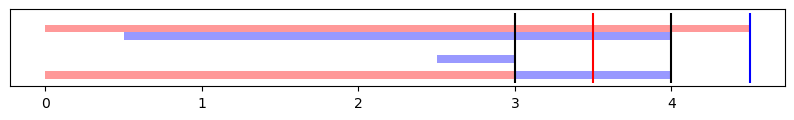

In [291]:
def plot_finterval(interval, task):
    task -= 1
    plt.axvspan(*interval, color=['blue', 'red'][task], alpha=0.4, linewidth=0., ymin=0.6 + 0.1*task, ymax=0.7 + 0.1*task)

def plot_attend(interval, task):
    plt.axvspan(*interval, color=['blue', 'red'][task-1], alpha=0.4, linewidth=0., ymin=0.1, ymax=0.2)

def plot_guidance(interval, task):
    plt.axvspan(*interval, color=['blue', 'red'][task-1], alpha=0.4, linewidth=0., ymin=0.3, ymax=0.4)

    


fig = plt.figure(figsize=(10,1))
plt.gca().set_yticks([])

plot_finterval([0,   4.5], 2)
plot_finterval([0.5, 4], 1)

plot_attend([0.0, 3.0], 2)

plot_guidance([2.5, 3.0], 1)
plot_attend([3.0, 4.0], 1)

plt.vlines(3, 0,1, color="black") # this is the task switch point from task 2 to task 1
plt.vlines(4, 0,1, color="black") # this is the task switch point from task 1 back to task 2


plt.vlines(3.5, 0, 1, color="red") # this is where task 2 would have been solved if guidance was NOT shown

plt.vlines(4.5, 0, 1, color="blue") # this is where task 1 would have been solved if guidance was NOT shown




(array([57., 53., 40., 53., 28., 31., 21., 23., 22., 18., 12., 16., 15.,
        15., 13., 12., 14.,  3.,  7.,  5.,  5.,  4.,  3.,  7.,  2.,  0.,
         1.,  1.,  1.,  4.,  2.,  3.,  1.,  1.,  2.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.]),
 array([5.04404653e-03, 1.20744027e-01, 2.36444007e-01, 3.52143987e-01,
        4.67843968e-01, 5.83543948e-01, 6.99243928e-01, 8.14943909e-01,
        9.30643889e-01, 1.04634387e+00, 1.16204385e+00, 1.27774383e+00,
        1.39344381e+00, 1.50914379e+00, 1.62484377e+00, 1.74054375e+00,
        1.85624373e+00, 1.97194371e+00, 2.08764369e+00, 2.20334367e+00,
        2.31904365e+00, 2.43474363e+00, 2.55044361e+00, 2.66614359e+00,
        2.78184357e+00, 2.89754355e+00, 3.01324353e+00, 3.12894351e+00,
        3.24464349e+00, 3.36034347e+00, 3.47604345e+00, 3.59174344e+00,
        3.70744342e+00, 3.82314340e+00, 3.93884338e+00, 4.05454336e+00,
        4.17024334e+00, 4.28594332e+00, 4.40164330e+00, 4.51734328e+

<Figure size 1000x100 with 0 Axes>

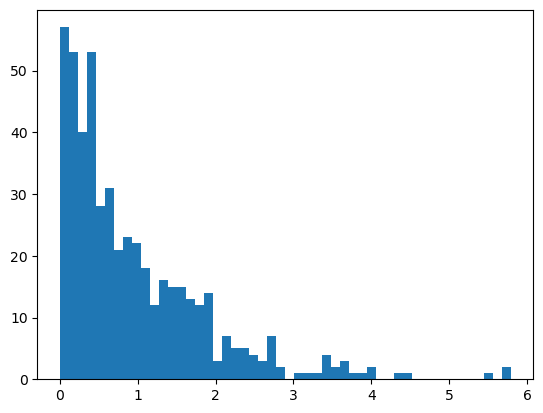

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import icua_analysis as ia

N = 500  # You can change this value to the number of intervals you want
GRACE_PERIOD = 2

def generate_random_intervals(N, mu=0, sigma=1):
    intervals = np.random.normal(mu, sigma, size=(N,2)) #+ (np.random.rand(N, 1) * N) 
    
    intervals = np.random.weibull(1, size=(N,2))
    
    intervals += np.abs(intervals.min())
    return np.sort(intervals, axis=1)

intervals = generate_random_intervals(N)

plt.figure(figsize=(10,1))
#ia.plot_intervals(intervals)

plt.figure()

fl = (intervals[:,1] - intervals[:,0]).ravel()
#plt.hist(np.log10(fl), bins=50)
plt.hist(fl, bins=50)

# 


<Axes: ylabel='Count'>

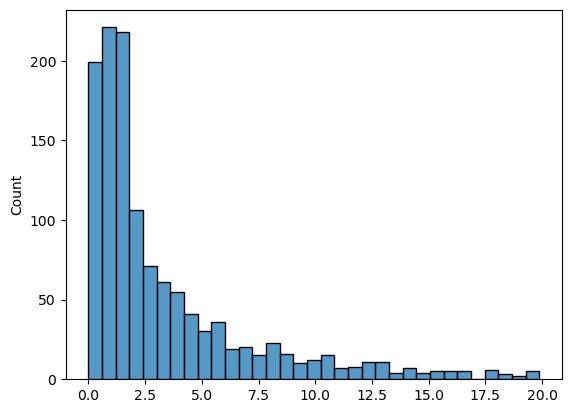

In [129]:
import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fi = ia.Performance.get_all_task_failure_intervals()
fl = fi['t2'] - fi['t1']

sns.histplot(fl[fl < 20])


In [ ]:
# plot actual performance to distribution

import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def get_fl(data):
    fi = ia.get_all_task_failure_intervals(data) # compute failure intervals
    scores = {task : (intervals['t2'] - intervals['t1']).to_numpy().astype(float) for task, intervals in fi.items()}
    scores = {task : score[score > 0] for task, score in scores.items()} # some are 0... this is weird...
    return scores

def get_minmax(fl):
    smin = min([min(x, default=float('inf')) for x in fl.values()])
    smax = max([max(x, default=-float('inf')) for x in fl.values()])
    return smin, smax

def plot_failure_length_distributions_all(figsize=(12,4), bins=100):
    dataset_iter = ia.load_tabularised().has_eyetracking()
    
    datasets = {}
    mins, maxs = float('inf'), -float('inf')
    for trial, tgroup in dataset_iter.groupby_trial():
        tdataset = {task:[] for task in ia.TASKS}
        for par, data in tgroup.items():
            for task, fl in get_fl(data).items():
                tdataset[task].append(fl)      
        tdataset = {task:np.concatenate(data, dtype=float) for task, data in tdataset.items()}
        _mins, _maxs = zip(*[(fl.min(), fl.max()) for _, fl in tdataset.items()])
        _mins, _maxs = min(list(_mins)), max(list(_maxs))
        mins, maxs = min(mins, _mins), max(maxs, _maxs)
        datasets[trial] = tdataset
    
    num_bins = bins
    mins, maxs = np.log10(mins), np.log10(maxs)
    bins = np.linspace(mins, maxs, num_bins)
    
    #fig, axes = plt.subplots(ncols=2, nrows=2, figsize=figsize, sharey='row', sharex=True)
    #for ax, (trial, fl) in zip(axes.ravel(), datasets.items()):
    for trial, fl in datasets.items():
        fig = plt.figure(figsize=figsize)
        ax = plt.gca()
        labels = [ia.get_task_properties(task)['name'].capitalize() + " task" for task in fl.keys()]
        colors = [ia.get_task_properties(task)['color'] for task in fl.keys()]
        scores = [np.log10(x) for x in fl.values()]
        n, bins, patches = ax.hist(scores, color=colors, label=labels, bins=bins, stacked=True, alpha=0.5)
        ax.set_xticklabels(['$10^{%d}$' % t for t in ax.get_xticks()])
        #plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.1f}'))
        ax.set_title(trial)
        plt.savefig(f"../result/{trial}_FL_dist.png", bbox_inches="tight", dpi=300)

    
    #plt.subplots_adjust(wspace=0.05)
    #return fig

fig = plot_failure_length_distributions_all(figsize=(6,1))
#plt.legend(fontsize=8, loc="upper left")
#plt.savefig("../result/icuA_FL_dist.png", bbox_inches="tight", dpi=300)
plt.show()

